In [1]:
#Imports
import matplotlib.pyplot as plt  
import matplotlib
import math as m  
import numpy as np 
import timeit 

matplotlib.rcParams['figure.figsize'] = (12, 7)

In [19]:
"OBEs - pulse"
def odederivs(y,t): # derivatives function 
    dy=np.zeros((len(y))) 

    dy[0] = -g_d*y[1]
    dy[1] = -gauss(t)*y[1]+(gauss(t))/2*(2.*y[2]-1)
    dy[2] = -(2*gauss(t))*y[1]
    return dy

def rk4(f, y, t, h):
    k1 = h * (f(y, t))
    k2 = h * (f((y+k1/2), t+h/2))
    k3 = h * (f((y+k2/2), t+h/2))
    k4 = h * (f((y+k3), (t+h)))
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

#gaussian pulse
def gauss(t):
    omega_t = Omega*np.exp(-(t-5)**2/(t_p**2))*np.sin(omega_L*t+phi)
    return omega_t

In [27]:
#Parameters
Omega = 2*np.pi*np.sqrt(1/np.pi) # inverse time units, so when t=1, expect one full flop as that
              # would have an area of 2 pi 
phi = np.pi/2
omega_L = 2*Omega
g_d = 0
t_p = 1

dt = 0.01
tmax = 10

tlist=np.arange(0.0, tmax, dt) 
npts = len(tlist)
y=np.zeros((npts,3)) 
yinit = np.array([0.0,0.0,0.0])
y1=yinit 
y[0,:]= y1

#rk4 parameters
yrk4 = np.zeros((npts,3))
yinitrk4 = np.array([0.0,0.0,0.0])
y1rk4 = yinitrk4
yrk4[0,:] = y1rk4

In [28]:
for i in range(1,npts):   # loop over time
    y1rk4 = rk4(odederivs, y1rk4, tlist[i-1], dt) 
    yrk4[i,:] = y1rk4


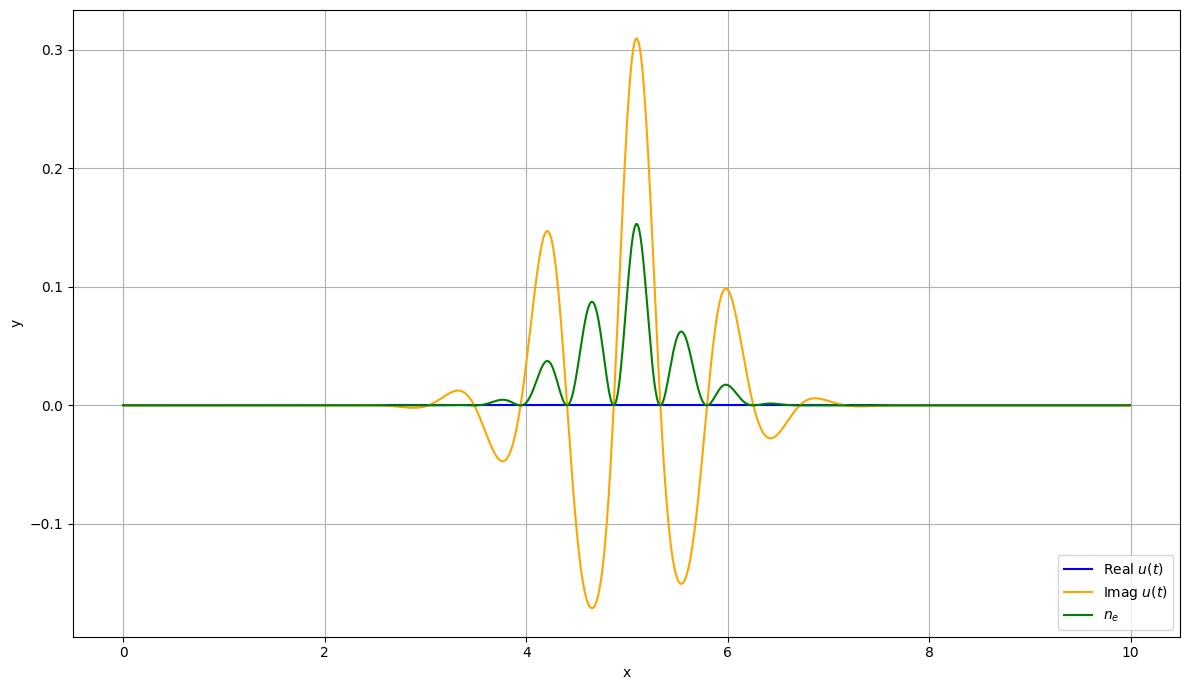

In [29]:
#plt.plot(tlist, yexact, 'b', label = 'Exact solution')
#plt.plot(tlist, y[:,2], 'r', label = 'Forward Euler')
plt.plot(tlist, yrk4[:,0], color = 'blue', label = 'Real $u(t)$')
plt.plot(tlist, yrk4[:,1], color = 'orange', label = 'Imag $u(t)$')
plt.plot(tlist, yrk4[:,2], color = 'green', label = '$n_e$')

#plt.plot(tlist, n_e(tlist),'-.', color = 'grey')

plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.grid()
plt.show() 